<a href="https://colab.research.google.com/github/Fordfire337/CS-4410-intro-machine-learning/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import re
from collections import Counter

import requests
import nltk
import matplotlib.pyplot as plt
import imageio
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from textblob import TextBlob

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:

#Download Hamlet text

target_url = "https://www.gutenberg.org/files/2265/2265-0.txt"
response = requests.get(target_url)
response.raise_for_status()
data = response.text

# create a TextBlob
blob = TextBlob(data)

In [5]:

# Remove header/footer

# makes word frequencies more about Hamlet and less about license.

def strip_gutenberg_header_footer(text: str) -> str:
    start = re.search(r"\*\*\*\s*START OF (THIS|THE) PROJECT GUTENBERG EBOOK.*\*\*\*", text, re.IGNORECASE)
    end = re.search(r"\*\*\*\s*END OF (THIS|THE) PROJECT GUTENBERG EBOOK.*\*\*\*", text, re.IGNORECASE)

    if start and end and start.end() < end.start():
        return text[start.end():end.start()]
    return text

hamlet_text = strip_gutenberg_header_footer(data)

In [6]:

# tokenize + clean + stopwords + lemmatize

stop_words = set(stopwords.words("english"))

# extra stopwords to exclude
extra_stops = {"thee", "thou", "thy", "ha", "hath", "doth", "shall", "would"}
stop_words |= extra_stops

lemmatizer = WordNetLemmatizer()

# Lowercase
hamlet_text = hamlet_text.lower()

# Tokenize
tokens = word_tokenize(hamlet_text)

clean_words = []
for t in tokens:
    # Keep alphabetic words only
    if t.isalpha() and t not in stop_words:
        clean_words.append(lemmatizer.lemmatize(t))

freq = Counter(clean_words)
top20 = freq.most_common(20)
top20

[('ham', 337),
 ('lord', 216),
 ('king', 181),
 ('haue', 175),
 ('come', 129),
 ('hamlet', 107),
 ('let', 107),
 ('good', 98),
 ('hor', 95),
 ('enter', 85),
 ('like', 81),
 ('oh', 81),
 ('father', 71),
 ('well', 70),
 ('make', 70),
 ('may', 69),
 ('know', 69),
 ('selfe', 67),
 ('sir', 65),
 ('loue', 65)]

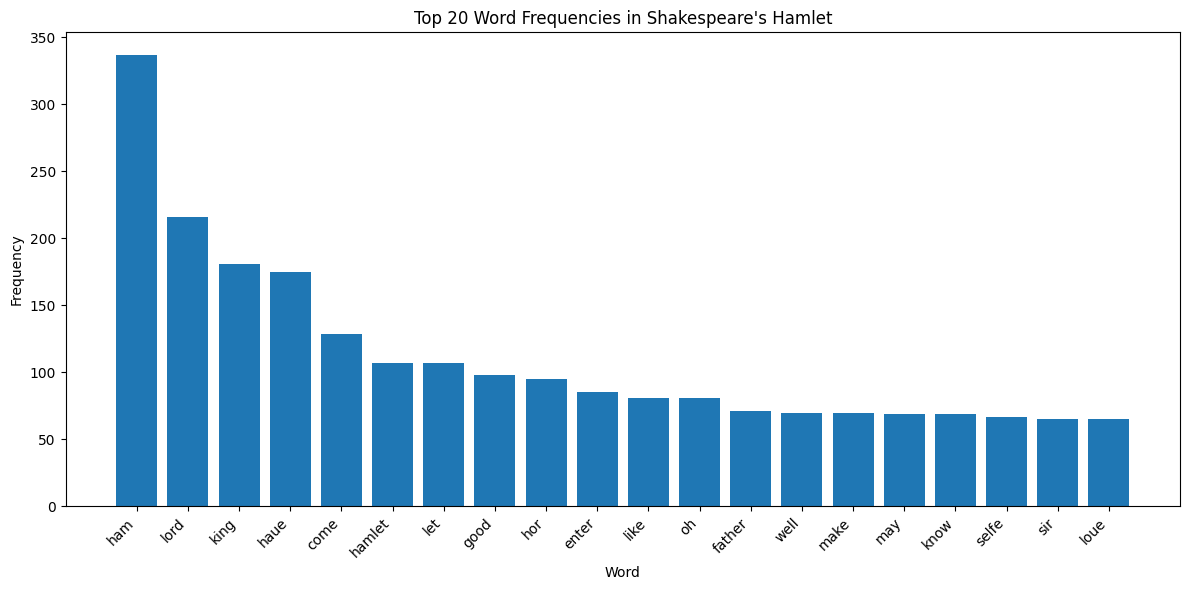

In [7]:
# Top-20 bar chart

words = [w for w, c in top20]
counts = [c for w, c in top20]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Word Frequencies in Shakespeare's Hamlet")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

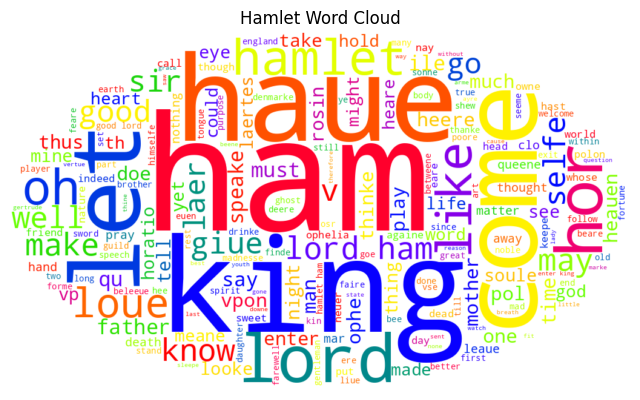

In [9]:

#Load mask, build word cloud

image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.v3.imread(image_file)

if mask_image.ndim == 3:
    mask_image = mask_image[:, :, 0]

wc = WordCloud(
    background_color="white",
    colormap="prism",
    mask=mask_image,
    stopwords=stop_words
)

wc.generate(" ".join(clean_words))

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Hamlet Word Cloud")
plt.show()